# Regression with Linear Algebra - Lab

## Introduction

In this lab, you'll apply regression analysis using simple matrix manipulations to fit a model to given data, and then predict new values for previously unseen data. You'll follow the approach highlighted in the previous lesson where you used NumPy to build the appropriate matrices and vectors and solve for the $\beta$ (unknown variables) vector. The beta vector will be used with test data to make new predictions. You'll also evaluate the model fit.
In order to make this experiment interesting, you'll use NumPy at every single stage of this experiment, i.e., loading data, creating matrices, performing train-test split, model fitting, and evaluation.
  

## Objectives

In this lab you will:

- Use matrix algebra to calculate the parameter values of a linear regression


First, let's import necessary libraries: 

In [27]:
import csv # for reading csv file
import numpy as np

## Dataset 

The dataset you'll use for this experiment is "**Sales Prices in the City of Windsor, Canada**", something very similar to the Boston Housing dataset. This dataset contains a number of input (independent) variables, including area, number of bedrooms/bathrooms, facilities(AC/garage), etc. and an output (dependent) variable, **price**.  You'll formulate a linear algebra problem to find linear mappings from input features using the equation provided in the previous lesson. 

This will allow you to find a relationship between house features and house price for the given data, allowing you to find unknown prices for houses, given the input features.  

A description of the dataset and included features is available [here](https://rdrr.io/cran/Ecdat/man/Housing.html).

In your repository, the dataset is available as `windsor_housing.csv`. There are 11 input features (first 11 columns):

	lotsize	bedrooms  bathrms  stories	driveway  recroom	fullbase  gashw	 airco  garagepl   prefarea

and 1 output feature i.e. **price** (12th column). 

The focus of this lab is not really answering a preset analytical question, but to learn how you can perform a regression experiment, using mathematical manipulations - similar to the one you performed using `statsmodels`. So you won't be using any `pandas` or `statsmodels` goodness here. The key objectives here are to: 

- Understand regression with matrix algebra and 
- Mastery in NumPy scientific computation

## Stage 1: Prepare data for modeling 

Let's give you a head start by importing the dataset. You'll perform the following steps to get the data ready for analysis:

* Initialize an empty list `data` for loading data
* Read the csv file containing complete (raw) `windsor_housing.csv`. [Use `csv.reader()` for loading data.](https://docs.python.org/3/library/csv.html). Store this in `data` one row at a time 

* Drop the first row of csv file as it contains the names of variables (header) which won't be used during analysis (keeping this will cause errors as it contains text values) 

* Append a column of all **1**s to the data (bias) as the first column

* Convert `data` to a NumPy array and inspect first few rows 

> NOTE: `read.csv()` reads the csv as a text file, so you should convert the contents to float.

In [28]:
# Your code here
data = []
with open('windsor_housing.csv') as f:
    raw = csv.reader(f)
    next(raw) # skips a line
    for row in raw:
        data.append([1.0] + [float(x) for x in row])
data=np.array(data)
data[:5]
data.shape

(546, 13)

In [29]:
# First 5 rows of raw data 

# array([[1.00e+00, 5.85e+03, 3.00e+00, 1.00e+00, 2.00e+00, 1.00e+00,
#         0.00e+00, 1.00e+00, 0.00e+00, 0.00e+00, 1.00e+00, 0.00e+00,
#         4.20e+04],
#        [1.00e+00, 4.00e+03, 2.00e+00, 1.00e+00, 1.00e+00, 1.00e+00,
#         0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
#         3.85e+04],
#        [1.00e+00, 3.06e+03, 3.00e+00, 1.00e+00, 1.00e+00, 1.00e+00,
#         0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
#         4.95e+04],
#        [1.00e+00, 6.65e+03, 3.00e+00, 1.00e+00, 2.00e+00, 1.00e+00,
#         1.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
#         6.05e+04],
#        [1.00e+00, 6.36e+03, 2.00e+00, 1.00e+00, 1.00e+00, 1.00e+00,
#         0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
#         6.10e+04]])

## Step 2: Perform a 80/20 train-test split

Explore NumPy's official documentation to manually split a dataset using a random sampling method of your choice. Some useful methods are located in the [numpy.random library](https://docs.scipy.org/doc/numpy-1.14.0/reference/routines.random.html).
* Perform a **random** 80/20 split on data using a method of your choice in NumPy
* Split the data to create `x_train`, `y_train`, `x_test`, and `y_test` arrays 
* Inspect the contents to see if the split performed as expected

> Note: When randomly splitting data, it's always recommended to set a seed in order to ensure reproducibility 

In [ ]:
# Your code here 
np.random.seed(42)
all_idx = np.arange(data.shape[0])

In [37]:
round(data.shape[0]*.8)

437

In [38]:
train = np.random.choice(all_idx, round(data.shape[0]*0.8), replace=False)
train_idx = np.isin(all_idx, train)
X_train, y_train = data[train_idx][:,:-1], data[train_idx][:,-1]
X_test, y_test = data[~train_idx][:,:-1], data[~train_idx][:,-1]

print('Split results')
print(f'Raw data shape: {data.shape}')
print(f'Train/Test Splt: {data[train_idx].shape} {data[~train_idx].shape}')
print(f"x_train, y_train, x_test, y_test: {X_train.shape, y_train.shape,X_test.shape, y_test.shape}")
# Split results
# Raw data Shape:  (546, 13)
# Train/Test Split: (437, 13) (109, 13)
# x_train, y_train, x_test, y_test: (437, 12) (437,) (109, 12) (109,)

Split results
Raw data shape: (546, 13)
Train/Test Splt: (437, 13) (109, 13)
x_train, y_train, x_test, y_test: ((437, 12), (437,), (109, 12), (109,))


## Step 3: Calculate the `beta` 

With $X$ and $y$ in place, you can now compute your beta values with $x_\text{train}$ and $y_\text{train}$ as:
#### $\beta = (x_\text{train}^T. x_\text{train})^{-1} . x_\text{train}^T . y_\text{train}$

* Using NumPy operations (transpose, inverse) that we saw earlier, compute the above equation in steps 
* Print your beta values 

In [39]:
# Your code here 
B = np.linalg.inv((X_train.T).dot(X_train)).dot((X_train.T).dot(y_train.T))
B


# Beta values
# Due to random split, your answers may vary 
# [-5.46637290e+03  3.62457767e+00  2.75100964e+03  1.47223649e+04
#   5.97774591e+03  5.71916945e+03  5.73109882e+03  3.83586258e+03
#   8.12674607e+03  1.33296437e+04  3.74995169e+03  1.01514699e+04]

array([-4.11853968e+03,  3.42002308e+00,  1.89074703e+03,  1.40404985e+04,
        6.60343536e+03,  6.81496423e+03,  3.87783742e+03,  6.53100057e+03,
        1.31694241e+04,  1.23481339e+04,  4.69080560e+03,  9.91027957e+03])

## Step 4: Make predictions
Great, you now have a set of coefficients that describe the linear mappings between $X$ and $y$. You can now use the calculated beta values with the test datasets that we left out to calculate $y$ predictions. Next, use all features in turn and multiply it with this beta. The result will give a prediction for each row which you can append to a new array of predictions.

$\hat{y} = x\beta = \beta_0 + \beta_1 x_1 +  \beta_2 x_2 + \ldots + \beta_m x_m $ 

* Create a new empty list (`y_pred`) for saving predictions
* For each row of `x_test`, take the dot product of the row with beta to calculate the prediction for that row
* Append the predictions to `y_pred`
* Print the new set of predictions

In [43]:
# Your code here 
y_hat = X_test.dot(B.T)

## Step 5: Evaluate model 

### Visualize actual vs. predicted values
This is exciting, now your model can use the beta value to predict the price of houses given the input features. Let's plot these predictions against the actual values in `y_test` to see how much our model deviates. 

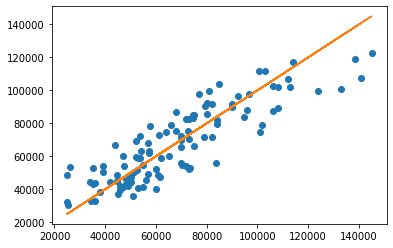

In [45]:
# Plot predicted and actual values as line plots
import matplotlib.pyplot as plt
plt.plot(y_test, y_hat, 'o')
plt.plot(y_test, y_test, '-')
plt.show()

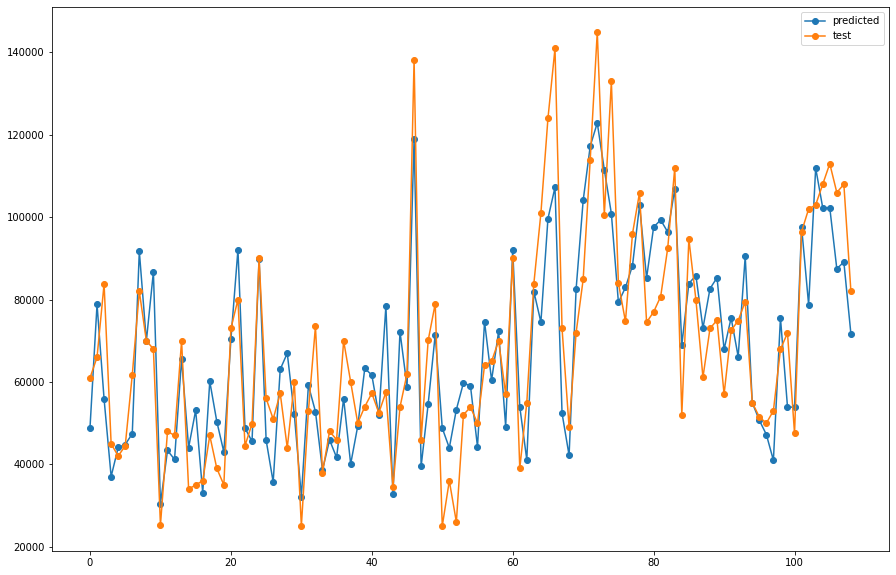

In [49]:
fig, ax = plt.subplots(figsize=(15,10))
ax.plot(np.arange(0,len(y_hat)), y_hat, 'o-', label='predicted')
ax.plot(np.arange(0,len(y_test)), y_test, 'o-', label='test')
ax.legend()


This doesn't look so bad, does it? Your model, although isn't perfect at this stage, is making a good attempt to predict house prices although a few prediction seem a bit out. There could be a number of reasons for this. Let's try to dig a bit deeper to check model's predictive abilities by comparing these prediction with actual values of `y_test` individually. That will help you calculate the RMSE value (root mean squared error) for your model. 

### Root Mean Squared Error
Here is the formula for RMSE:  

$$ \large RMSE = \sqrt{\sum^N_{i=1}\dfrac{ (\text{Predicted}_i-\text{Actual}_i)^2}{N}}$$

* Initialize an empty array `err`
* For each row in `y_test` and `y_pred`, take the squared difference and append error for each row in the `err` array
* Calculate $RMSE$ from `err` using the formula shown above 

In [52]:
# Calculate RMSE
err = []
rmse = np.sqrt(np.sum((y_hat - y_test)**2)/len(y_hat))
# Due to random split, your answers may vary 
# RMSE = 14868.172645765708

### Normalized root mean squared error
The above error is clearly in terms of the dependent variable, i.e., the final house price. You can also use a normalized mean squared error in case of multiple regression which can be calculated from RMSE using following the formula:

$$ \large NRMSE = \dfrac{RMSE}{max_i y_i - min_i y_i} $$

* Calculate normalized RMSE

In [54]:
# Calculate NRMSE
nrmse = rmse/(y_test.max()-y_test.min())
nrmse
# Due to random split, your answers may vary 
# 0.09011013724706489

0.10740314388481437

R-squared: 0.7568140696935475
Adjusted R-squared: 0.7292362837825065
time it takes to run using numpy: 0.03407692909240723s


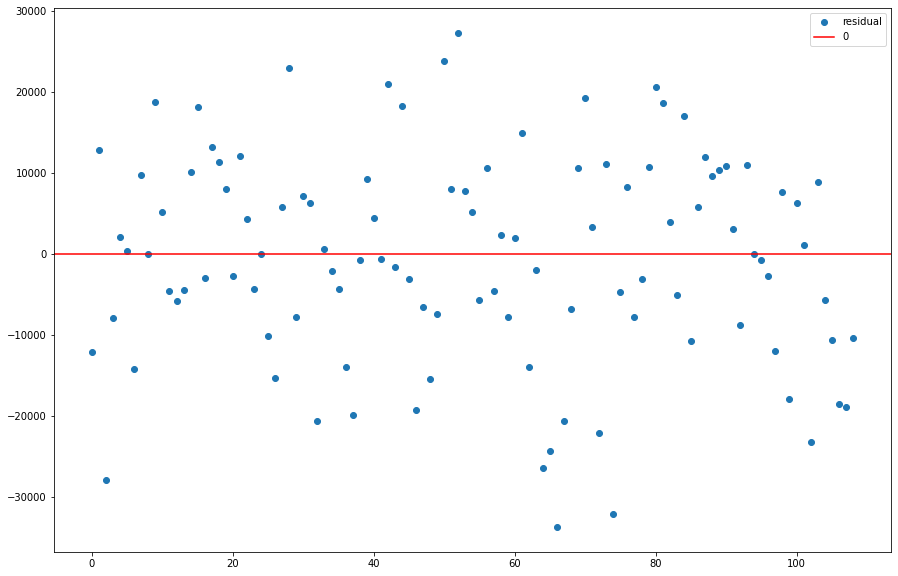

In [69]:
import time
start_time = time.time()
test_mean = y_test.mean()
r_sq = 1-np.sum((y_test-y_hat)**2)/np.sum((y_test-test_mean)**2)
r_sq
N = len(y_test)
K = X_test.shape[1]-1
r_sq_adj = 1-(1-r_sq)*(N-1)/(N-K-1)

fig, ax = plt.subplots(figsize=(15,10))
ax.plot(np.arange(0,len(y_hat)), y_hat-y_test, 'o', label='residual')
ax.axhline(0, color='r', label='0')
ax.legend()
print(f'R-squared: {r_sq}')
print(f'Adjusted R-squared: {r_sq_adj}')
print(f'time it takes to run using numpy: {time.time()-start_time}s')

In [74]:
X_train.shape, y_train.shape

((437, 12), (437,))

In [75]:
nsample = 100
x = np.linspace(0, 10, 100)
X = np.column_stack((x, x**2))
beta = np.array([1, 0.1, 10])
e = np.random.normal(size=nsample)

In [76]:
X = sm.add_constant(X)
y = np.dot(X, beta) + e
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.736e+06
Date:                Fri, 04 Sep 2020   Prob (F-statistic):          9.87e-238
Time:                        04:03:11   Log-Likelihood:                -150.20
No. Observations:                 100   AIC:                             306.4
Df Residuals:                      97   BIC:                             314.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.3946      0.324      4.298      0.0

In [77]:
X.shape, y.shape

((100, 3), (100,))

In [78]:
import statsmodels.api as sm
model = sm.OLS(y_train, X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.652
Model:                            OLS   Adj. R-squared:                  0.643
Method:                 Least Squares   F-statistic:                     72.51
Date:                Fri, 04 Sep 2020   Prob (F-statistic):           2.71e-90
Time:                        04:03:42   Log-Likelihood:                -4845.1
No. Observations:                 437   AIC:                             9714.
Df Residuals:                     425   BIC:                             9763.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4118.5397   4086.351     -1.008      0.314   -1.22e+04    3913.435
x1             3.4200      0.420      8.145      0.000       2.595       4.245
x2          1890.7470   1215.185      1.556      0.120    -497.773    4279.267
x3          1.404e+04   1695.081      8.283      0.000    1.07e+04    1.74e+04
x4          6603.4354   1071.633      6.162      0.000    4497.076    8709.795
x5          6814.9642   2430.440      2.804      0.005    2037.786    1.16e+04
x6          3877.8374   2213.251      1.752      0.080    -472.443    8228.117
x7          6531.0006   1811.171      3.606      0.000    2971.033    1.01e+04
x8          1.317e+04   3736.748      3.524      0.000    5824.616    2.05e+04
x9          1.235e+04   1834.079      6.733      0.000    8743.139     1.6e+04
x10         4690.8056    960.886      4.882      0.000    2802.125    6579.486
x11         9910.2796   1930.129      5.135      0.000    6116.492    1.37e+04
==============================================================================
Omnibus:                       79.467   Durbin-Watson:                   1.578
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              210.818
Skew:                           0.883   Prob(JB):                     1.67e-46
Kurtosis:                       5.909   Cond. No.                     3.16e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.16e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [79]:
y_hat = model.predict(X_test)

R-squared: 0.7568140696935468
Adjusted R-squared: 0.7292362837825057
time it takes to run using numpy: 0.036457061767578125s


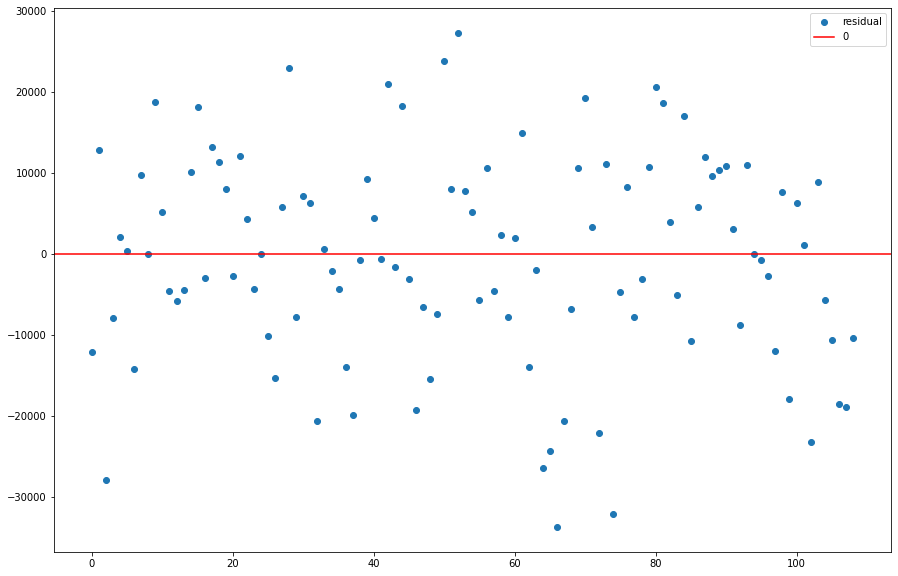

In [80]:
start_time = time.time()
test_mean = y_test.mean()
r_sq = 1-np.sum((y_test-y_hat)**2)/np.sum((y_test-test_mean)**2)
r_sq
N = len(y_test)
K = X_test.shape[1]-1
r_sq_adj = 1-(1-r_sq)*(N-1)/(N-K-1)

fig, ax = plt.subplots(figsize=(15,10))
ax.plot(np.arange(0,len(y_hat)), y_hat-y_test, 'o', label='residual')
ax.axhline(0, color='r', label='0')
ax.legend()
print(f'R-squared: {r_sq}')
print(f'Adjusted R-squared: {r_sq_adj}')
print(f'time it takes to run using statsmodels: {time.time()-start_time}s')

There it is. A complete multiple regression analysis using nothing but NumPy. Having good programming skills in NumPy allows you to dig deeper into analytical algorithms in machine learning and deep learning. Using matrix multiplication techniques you saw here, you can easily build a whole neural network from scratch. 

## Level up (Optional)

* Calculate the R-squared and adjusted R-squared for the above model 
* Plot the residuals (similar to `statsmodels`) and comment on the variance and heteroscedasticity
* Run the experiment in `statsmodels` and compare the performance of both approaches in terms of computational cost

## Summary

In this lab, you built a predictive model for predicting house prices. Remember this is a very naive implementation of regression modeling. The purpose here was to get an introduction to the applications of linear algebra into machine learning and predictive analysis. There are a number of shortcomings in this modeling approach and you can further apply a number of data modeling techniques to improve this model. 